In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sns.set(style='ticks')
# pandas defaults
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
# color default
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list = [CB91_Blue, CB91_Green, CB91_Pink, CB91_Purple, CB91_Violet, CB91_Amber]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['text.color'] = 'white'

In [2]:
import IPython.display as ipd
import os
import pathlib 

In [3]:
import librosa
import librosa.display
import scipy.io.wavfile as wav
import scipy.signal as signal

In [4]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

/var/folders/58/5z667b6s1gg4bds1bzj3sw580000gn/T/ipykernel_2573/1731696397.py:3: MatplotlibDeprecationWarning: mplDeprecation was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use matplotlib.MatplotlibDeprecationWarning instead.
  warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)


In [5]:
def remove_grid_lines(axs):
    """Remove the default grid lines from a collection of axies."""
    for ax in axs.flatten():
        ax.grid(False)

In [6]:
DATASET_PATH = "/Users/seantedesco/Documents/classifying_marine_mammals_vocals_with_CNN_and_Dolby/training_data/"

In [7]:
# loop through all the animals

labels = []
audio = []
files = []

for i, (dirpath, dirnames, filenames) in enumerate(os.walk(DATASET_PATH)):
        
    # ensure that we're not at the root level
    if dirpath is not DATASET_PATH:
            
        # save the semantic label
        dirpath_components = dirpath.split("/") # genre/blues => ['genre', 'blues']
        semantic_label = dirpath_components[-1]
        if semantic_label not in ('.ipynb_checkpoints'):
            labels.append(semantic_label)
            
            
        # process files for a specific genre
        for f in filenames:
            files.append(f)
                
            # load the audio file
            file_path = os.path.join(dirpath, f)
            sig, sr = librosa.load(file_path, sr=22050)
            audio.append(sig)

In [8]:
labels

['WeddellSeal', 'Walrus']

In [9]:
audio

[array([-0.01148437, -0.01136455, -0.00378522, ..., -0.04705054,
        -0.04668419, -0.03679726], dtype=float32),
 array([ 1.8592604e-03,  2.3713997e-03,  6.9348776e-04, ...,
        -2.9242178e-03, -2.2149209e-03,  5.9021619e-05], dtype=float32),
 array([ 0.00149142, -0.0013256 , -0.00133739, ...,  0.00070546,
        -0.00121157, -0.00046932], dtype=float32),
 array([ 4.5961672e-03,  4.5317956e-03,  8.7302448e-03, ...,
        -6.7975282e-07,  3.9601822e-05,  0.0000000e+00], dtype=float32),
 array([-0.00428818, -0.00834003, -0.00598431, ...,  0.00038083,
        -0.00026995,  0.        ], dtype=float32),
 array([-3.9686859e-03, -1.1341292e-02, -6.2095821e-03, ...,
        -6.9209542e-05,  6.6484965e-05,  0.0000000e+00], dtype=float32),
 array([ 7.1843882e-04, -2.4049175e-03, -4.3120695e-04, ...,
        -8.3419269e-05,  3.3779732e-05,  0.0000000e+00], dtype=float32),
 array([-0.01315443, -0.01781974, -0.01582187, ...,  0.00016102,
        -0.00019554,  0.        ], dtype=float32),


In [11]:
# inspect audio
ipd.Audio(audio[6], rate=22050)

In [10]:
# check shape out
audio[6].shape

(661478,)

In [12]:
files

['new_weddell_seal18.wav',
 'new_weddell_seal30.wav',
 'new_weddell_seal24.wav',
 'new_weddell_seal_aug_101.wav',
 'new_weddell_seal_aug_115.wav',
 'new_weddell_seal_aug_129.wav',
 'new_weddell_seal_aug_43.wav',
 'new_weddell_seal_aug_57.wav',
 'new_weddell_seal_aug_80.wav',
 'new_weddell_seal_aug_94.wav',
 'new_weddell_seal126.wav',
 'new_weddell_seal132.wav',
 'new_weddell_seal127.wav',
 'new_weddell_seal_aug_95.wav',
 'new_weddell_seal_aug_81.wav',
 'new_weddell_seal_aug_56.wav',
 'new_weddell_seal_aug_42.wav',
 'new_weddell_seal_aug_128.wav',
 'new_weddell_seal_aug_114.wav',
 'new_weddell_seal_aug_100.wav',
 'new_weddell_seal25.wav',
 'new_weddell_seal31.wav',
 'new_weddell_seal19.wav',
 'new_weddell_seal27.wav',
 'new_weddell_seal33.wav',
 'new_weddell_seal_aug_116.wav',
 'new_weddell_seal_aug_102.wav',
 'new_weddell_seal_aug_68.wav',
 'new_weddell_seal_aug_54.wav',
 'new_weddell_seal_aug_40.wav',
 'new_weddell_seal_aug_97.wav',
 'new_weddell_seal_aug_83.wav',
 'new_weddell_seal13

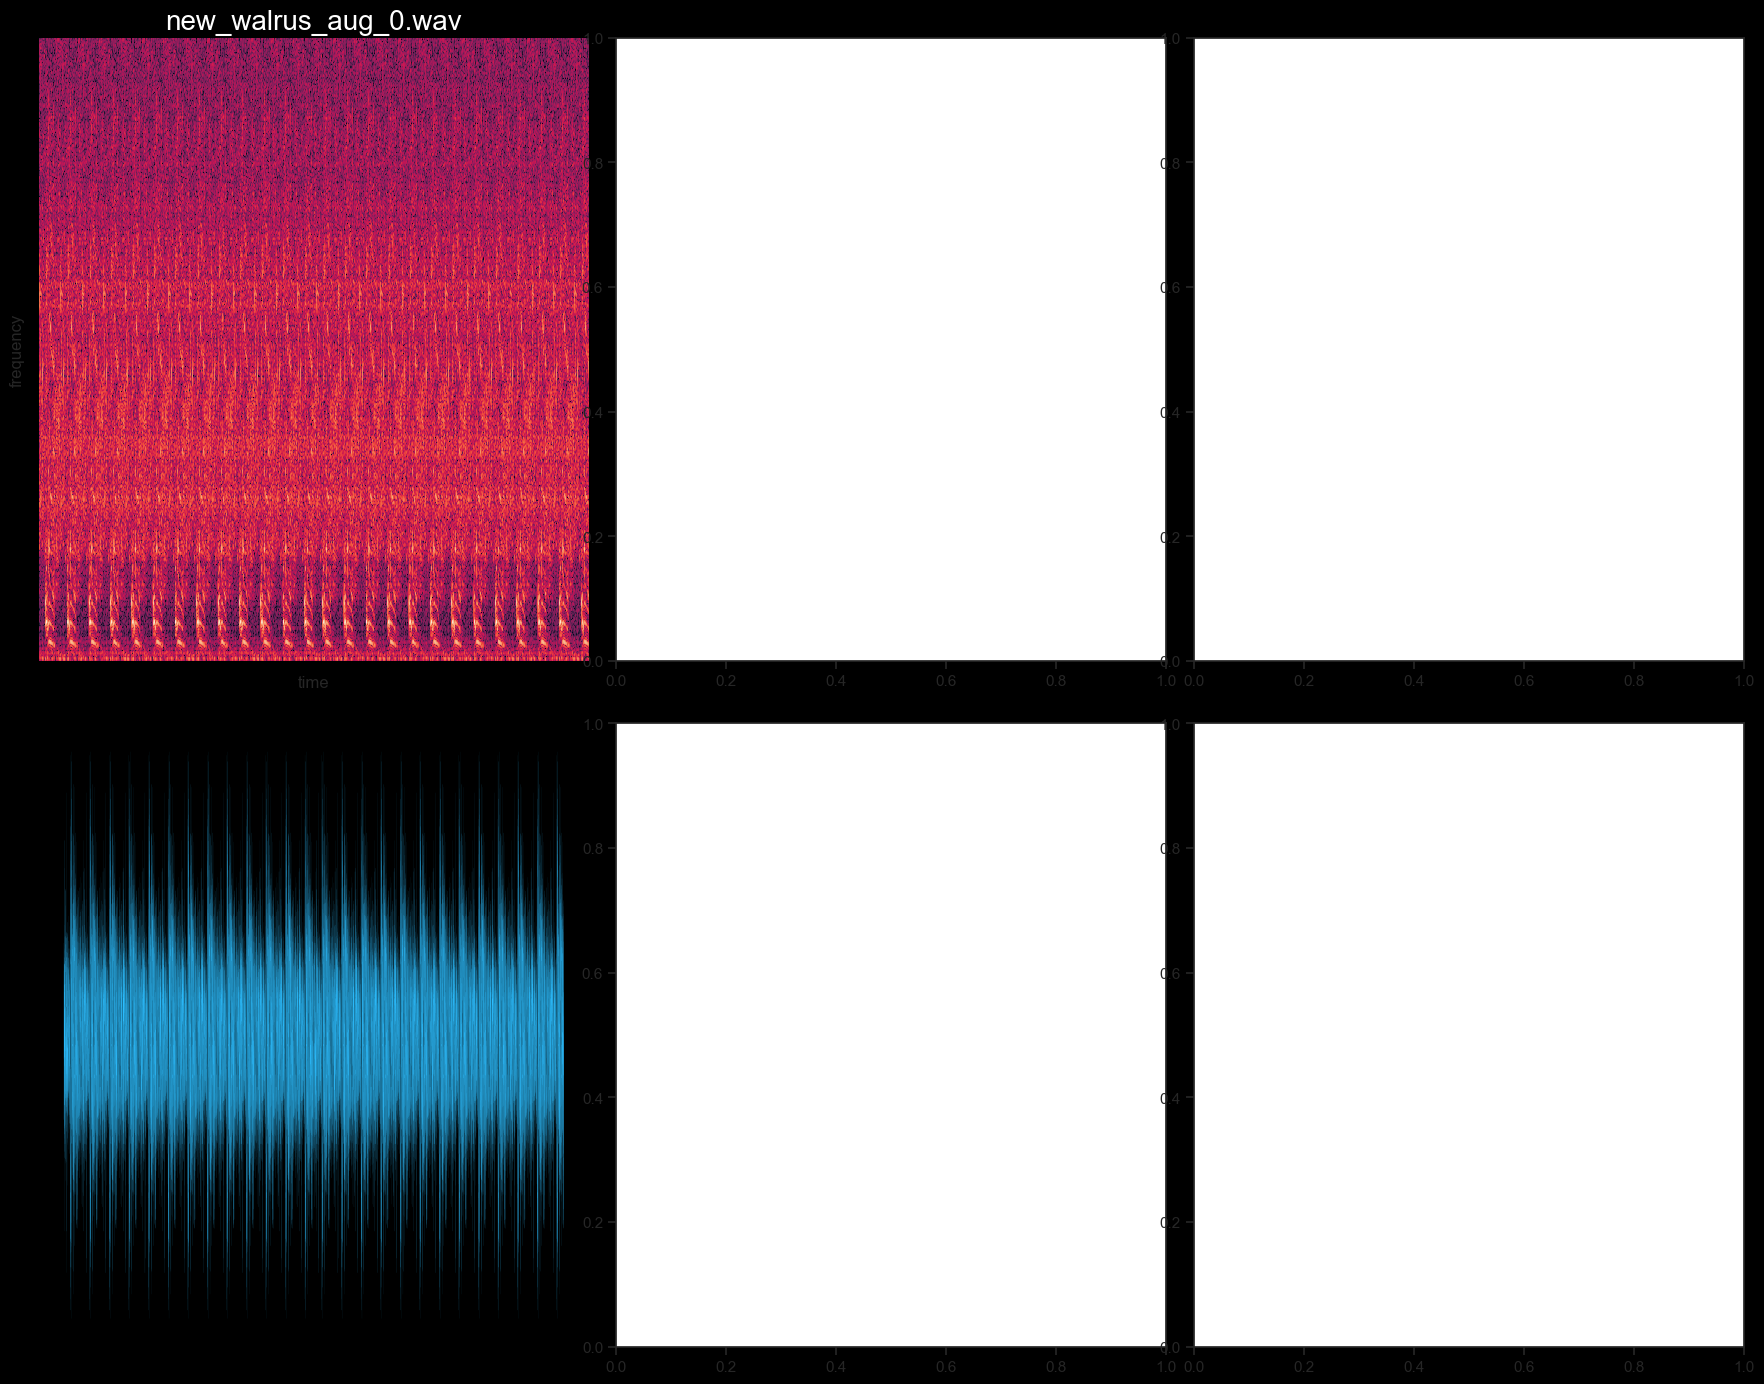

In [17]:
path_name = "/Users/seantedesco/Documents/classifying_marine_mammals_vocals_with_CNN_and_Dolby/sub_tests/"

files = os.listdir(path_name)
columns=3
fig, ax = plt.subplots(int(np.ceil(len(files)/columns))*2,columns,figsize=(22,17))
# fig.suptitle("Frequency Spectrum & Oscillogram", x=0.5, y=0.91, fontsize=16)

for idx, file in enumerate(files):
    r,c = idx//columns*2, idx%columns
    rate, data = wav.read(path_name + "{}".format(file))
    f, t, Sxx = signal.spectrogram(data, fs=rate, nperseg=512, nfft=2048)
    d = 20*np.log10(Sxx+1e-10)
    ax[r,c].pcolormesh(t,f,d, vmin=-1e1,vmax=d.max())
    ax[r,c].set_title(file, fontsize=20);
    if not c and not r:
        ax[r,c].set_xlabel("time")
        ax[r,c].set_ylabel("frequency");
        ax[r,c].set_xticks([])
        ax[r,c].set_frame_on(False)
        ax[r,c].set_yticks([])
    else: ax[r,c].axis("off")
    
    norm_data = (data -data.mean())/data.std()
    ax[r+1,c].plot(norm_data,lw=0.03)
    ax[r+1,c].axis("off") 

plt.subplots_adjust(wspace=0.05, hspace=0.1)
#plt.savefig("../images/Spectro_Oscilo2.png", bbox_inches='tight')